In [46]:
import pandas as pd
import numpy as np
import collections as cols
import pandas as pd
import matplotlib.pyplot as plt


# Cargar el archivo CSV
file_path = 'databases/Base de datos HACQ.csv'
df = pd.read_csv(file_path)
print(df)
print(df.columns)

        var001       var002      var003  month  year     __sexo  __hgt  \
0       168692  U0004802741   4/11/2023      4  2023  Masculino    NaN   
1       214287  U0005119913   11/5/2023     11  2023  Masculino    NaN   
2       113755  U0004427396   8/13/2022      8  2022  Masculino    NaN   
3       202840  U0005038530   9/16/2023      9  2023  Masculino    NaN   
4        31544  U0003873327    7/6/2021      7  2021  Masculino    NaN   
...        ...          ...         ...    ...   ...        ...    ...   
103156  137998  U0004600580  11/26/2022     11  2022   Femenino    NaN   
103157   50108  U0003998985  10/21/2021     10  2021   Femenino  101.0   
103158   98326  U0004327713    6/3/2022      6  2022  Masculino    NaN   
103159  187747  U0004932755    7/1/2023      7  2023  Masculino    NaN   
103160  108243  U0004392833   7/20/2022      7  2022   Femenino    NaN   

        __temperatura  __pulso  __pas  __pad  __fres  __sat02  __peso  \
0           36.299999     81.0    NaN 

In [47]:
# Paso 1: Eliminar las columnas no útiles
df_cleaned = df.drop(columns=['var001', 'var002', 'var003', 'year'])

print(df_cleaned)

        month     __sexo  __hgt  __temperatura  __pulso  __pas  __pad  __fres  \
0           4  Masculino    NaN      36.299999     81.0    NaN    NaN     NaN   
1          11  Masculino    NaN      36.400002    105.0  185.0   96.0     NaN   
2           8  Masculino    NaN      36.200001    101.0    NaN    NaN     NaN   
3           9  Masculino    NaN      36.400002    106.0  125.0   99.0     NaN   
4           7  Masculino    NaN      36.500000     57.0  118.0   66.0     NaN   
...       ...        ...    ...            ...      ...    ...    ...     ...   
103156     11   Femenino    NaN      36.299999     74.0  152.0   97.0     NaN   
103157     10   Femenino  101.0      36.500000     60.0  143.0   78.0     NaN   
103158      6  Masculino    NaN      36.299999     77.0  163.0   77.0     NaN   
103159      7  Masculino    NaN      36.400002    112.0  143.0   83.0     NaN   
103160      7   Femenino    NaN      36.000000     82.0  167.0   90.0     NaN   

        __sat02  __peso  __

In [49]:
# Paso 2: Convertir las columnas categóricas a valores numéricos usando Label Encoding
'''
label_encoders = {}
for column in ['__sexo','__destino','__categorizacion']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str))
    label_encoders[column] = le
df_cleaned['__categorizacion'] = df_cleaned['__categorizacion'] + 1
'''

df['__destino'] = pd.Categorical(df['__destino']).codes

print(df_cleaned)

        month     __sexo  __hgt  __temperatura  __pulso  __pas  __pad  __fres  \
0           4  Masculino    NaN      36.299999     81.0    NaN    NaN     NaN   
1          11  Masculino    NaN      36.400002    105.0  185.0   96.0     NaN   
2           8  Masculino    NaN      36.200001    101.0    NaN    NaN     NaN   
3           9  Masculino    NaN      36.400002    106.0  125.0   99.0     NaN   
4           7  Masculino    NaN      36.500000     57.0  118.0   66.0     NaN   
...       ...        ...    ...            ...      ...    ...    ...     ...   
103156     11   Femenino    NaN      36.299999     74.0  152.0   97.0     NaN   
103157     10   Femenino  101.0      36.500000     60.0  143.0   78.0     NaN   
103158      6  Masculino    NaN      36.299999     77.0  163.0   77.0     NaN   
103159      7  Masculino    NaN      36.400002    112.0  143.0   83.0     NaN   
103160      7   Femenino    NaN      36.000000     82.0  167.0   90.0     NaN   

        __sat02  __peso  __

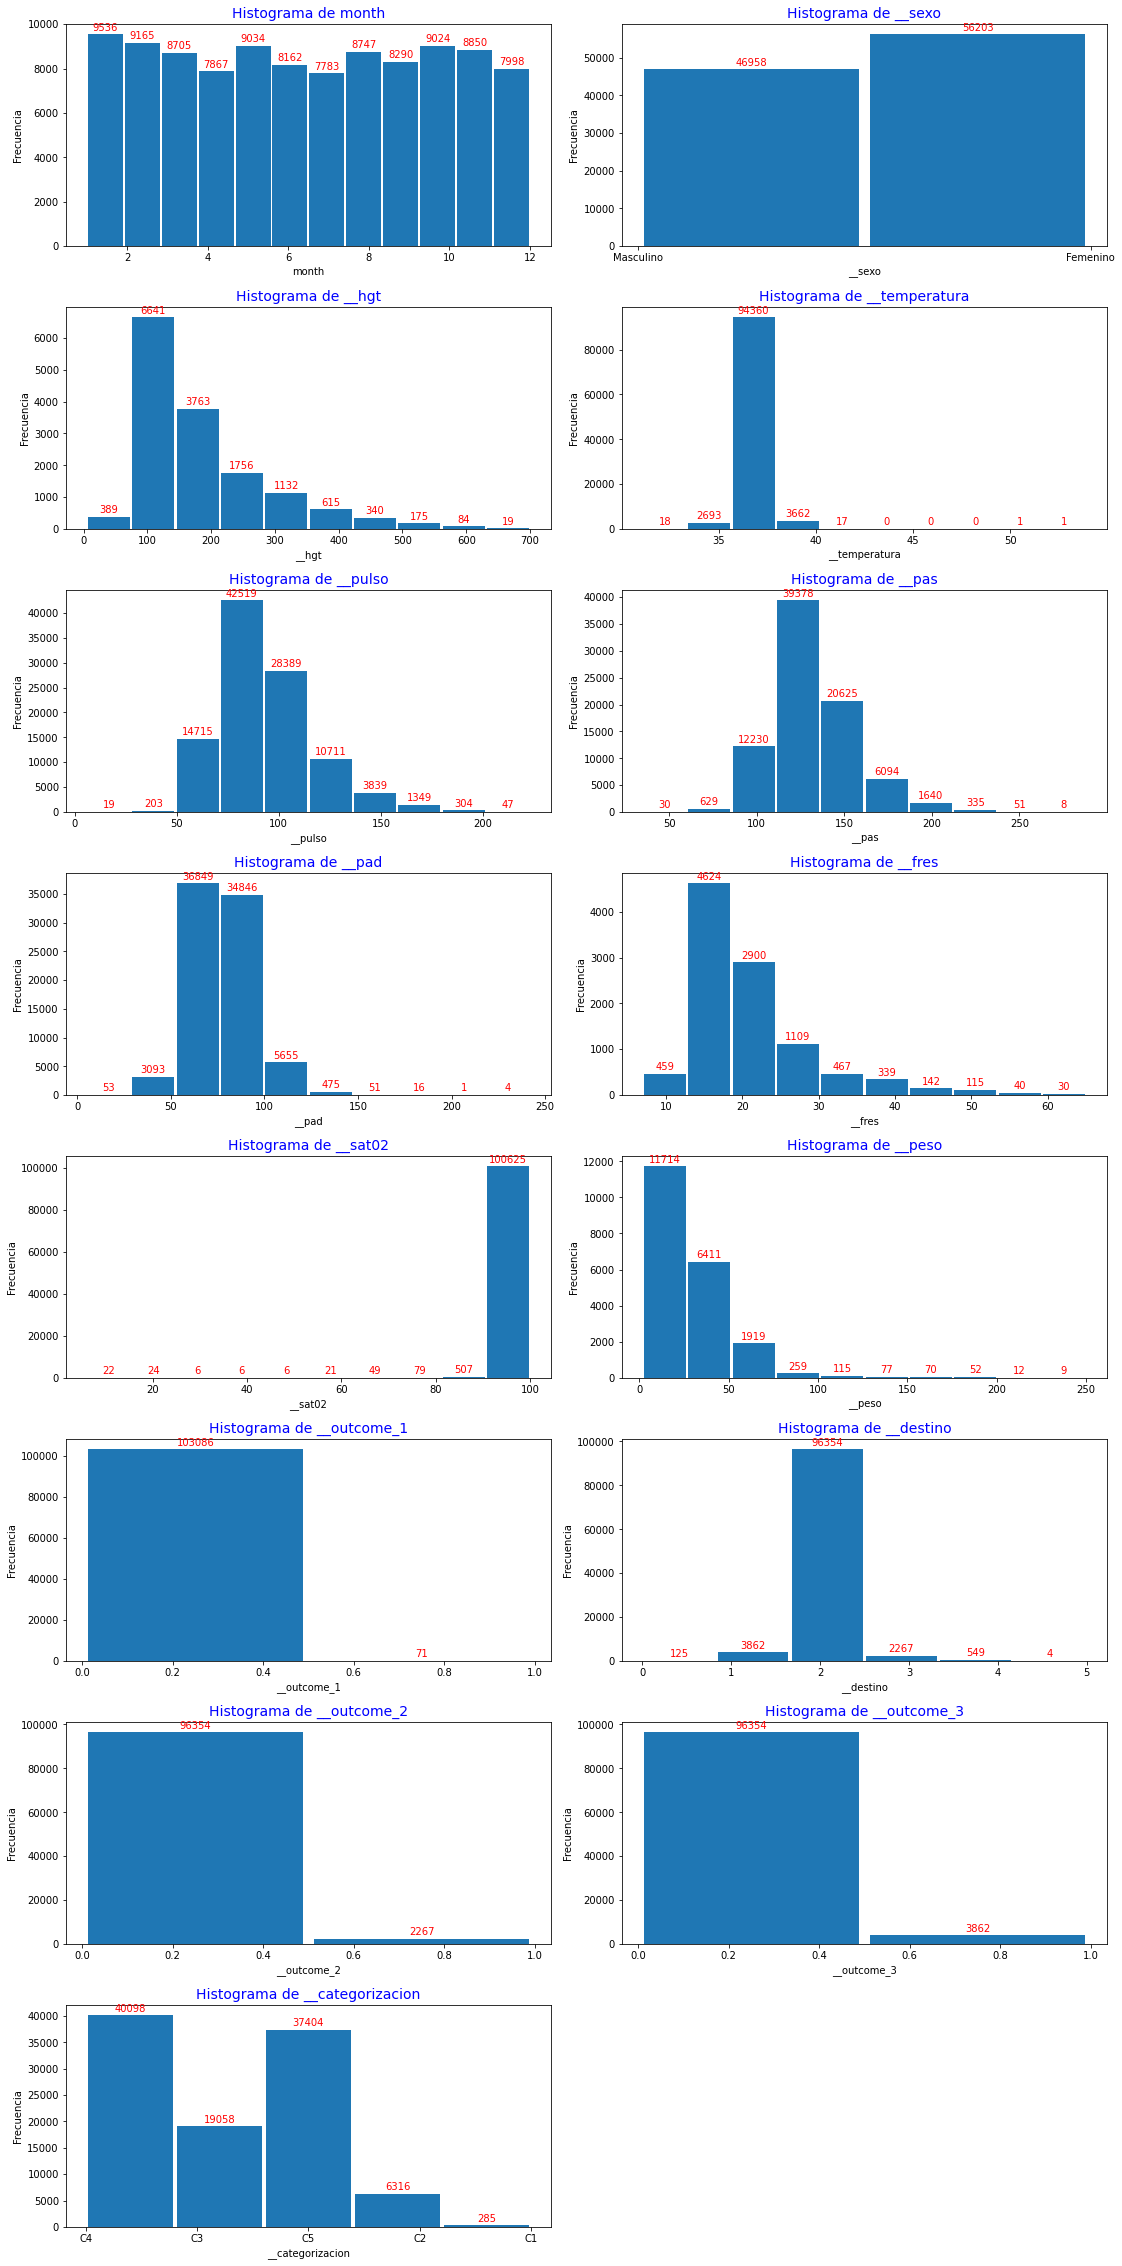

In [51]:
# Histogramas
font2 = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }

# Determinar el número de filas necesarias
num_columns = 2
num_rows = (len(df_cleaned.columns) + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

# Crear una cuadrícula de gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, num_rows * 4))

# Ajustar el espacio entre gráficos
fig.tight_layout(pad=4.0)

# Iterar sobre las columnas y crear gráficos
for i, column in enumerate(df_cleaned.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]

    # Calcular el número de bins basado en valores únicos
    unique_values = df_cleaned[column].nunique()
    bins = unique_values if unique_values <= 12 else 10

    n, bins, patches = ax.hist(df_cleaned[column], bins=bins, rwidth=0.95)
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')
    ax.set_title(f'Histograma de {column}', fontdict=font2)

    # Añadir texto sobre cada barra del histograma
    for patch, count in zip(patches, n):
        height = patch.get_height()
        ax.annotate(f'{int(count)}', 
                    xy=(patch.get_x() + patch.get_width() / 2, height),
                    xytext=(0, 2),  # 3 puntos de desplazamiento hacia arriba
                    textcoords="offset points",
                    ha='center', va='bottom', 
                    color='red', fontsize=10)

# Eliminar los ejes vacíos
for i in range(len(df_cleaned.columns), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])


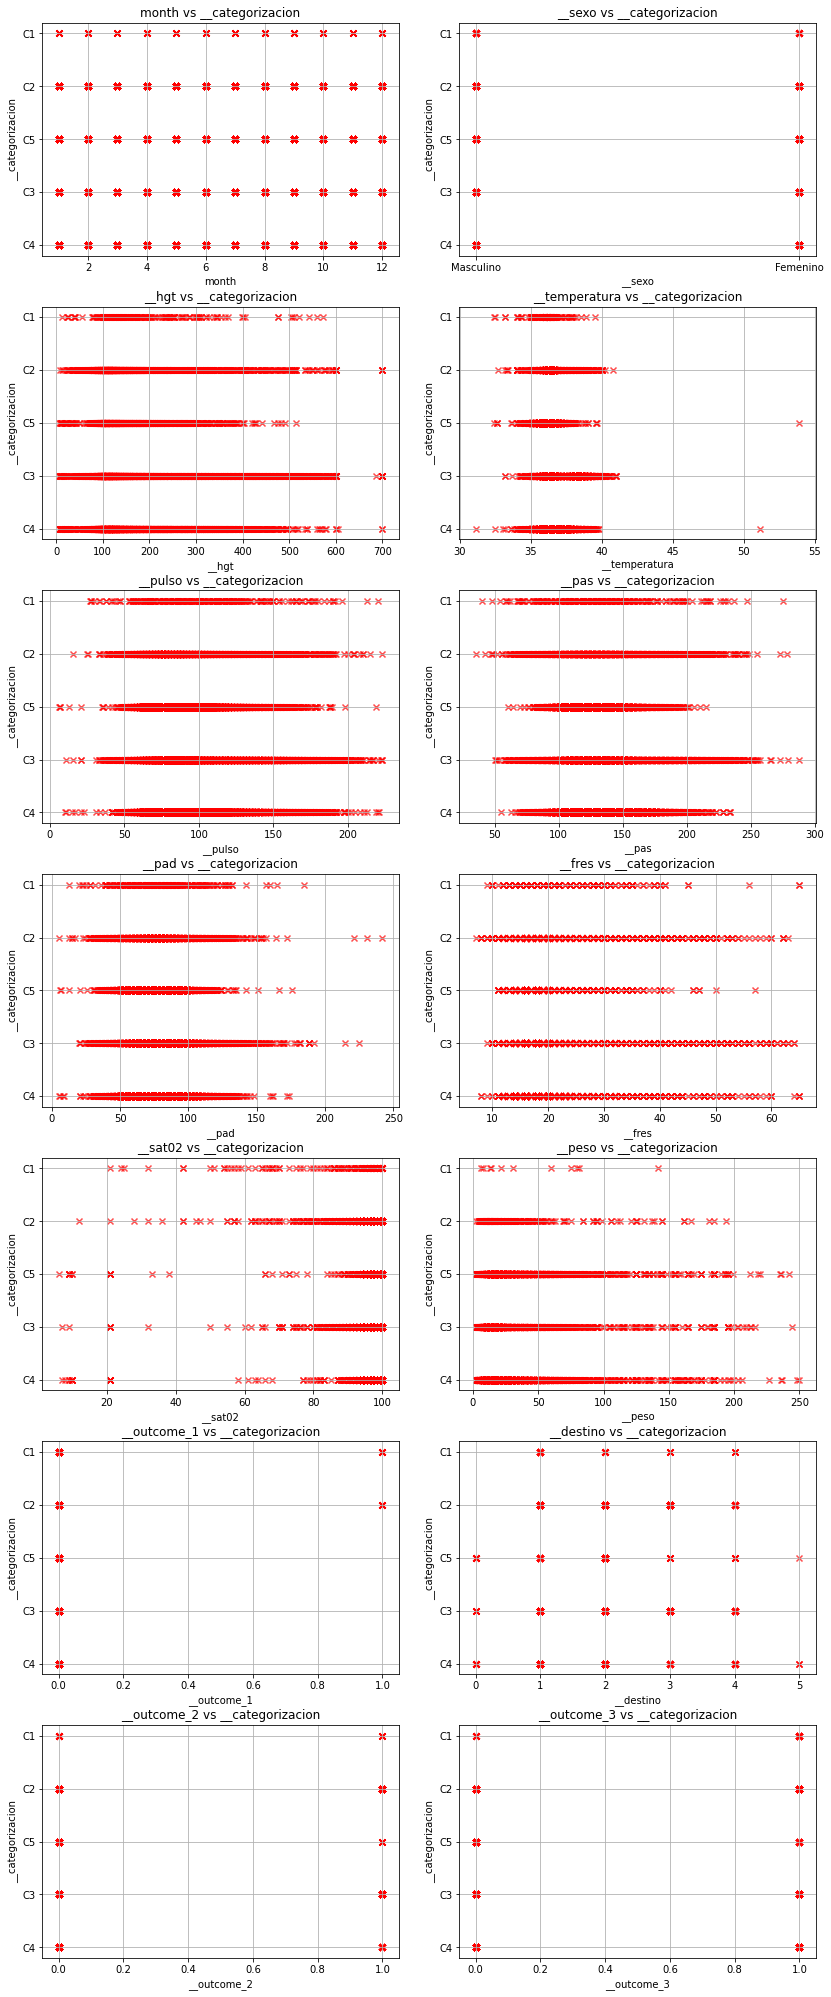

In [50]:
# Lista de columnas que queremos graficar contra '__categorizacion'
columns_to_plot = ['month', '__sexo', '__hgt', '__temperatura', '__pulso', 
                   '__pas', '__pad', '__fres', '__sat02', '__peso', 
                   '__outcome_1', '__destino', '__outcome_2', '__outcome_3']

# Determinar el número de filas necesarias
num_columns = 2
num_rows = (len(columns_to_plot) + num_columns - 1) // num_columns  # Calcular el número de filas necesarias

# Crear una cuadrícula de gráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(12, num_rows * 4))

# Ajustar el espacio entre gráficos
fig.tight_layout(pad=3.0)

# Iterar sobre las columnas y crear gráficos
for i, column in enumerate(columns_to_plot):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]
        
    ax.scatter(df_cleaned[column], df_cleaned['__categorizacion'], alpha=0.7, marker='x', color = "red")
    ax.set_xlabel(column)
    ax.set_ylabel('__categorizacion')
    ax.set_title(f'{column} vs __categorizacion')
    ax.grid(True)

# Eliminar los ejes vacíos
for i in range(len(columns_to_plot), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

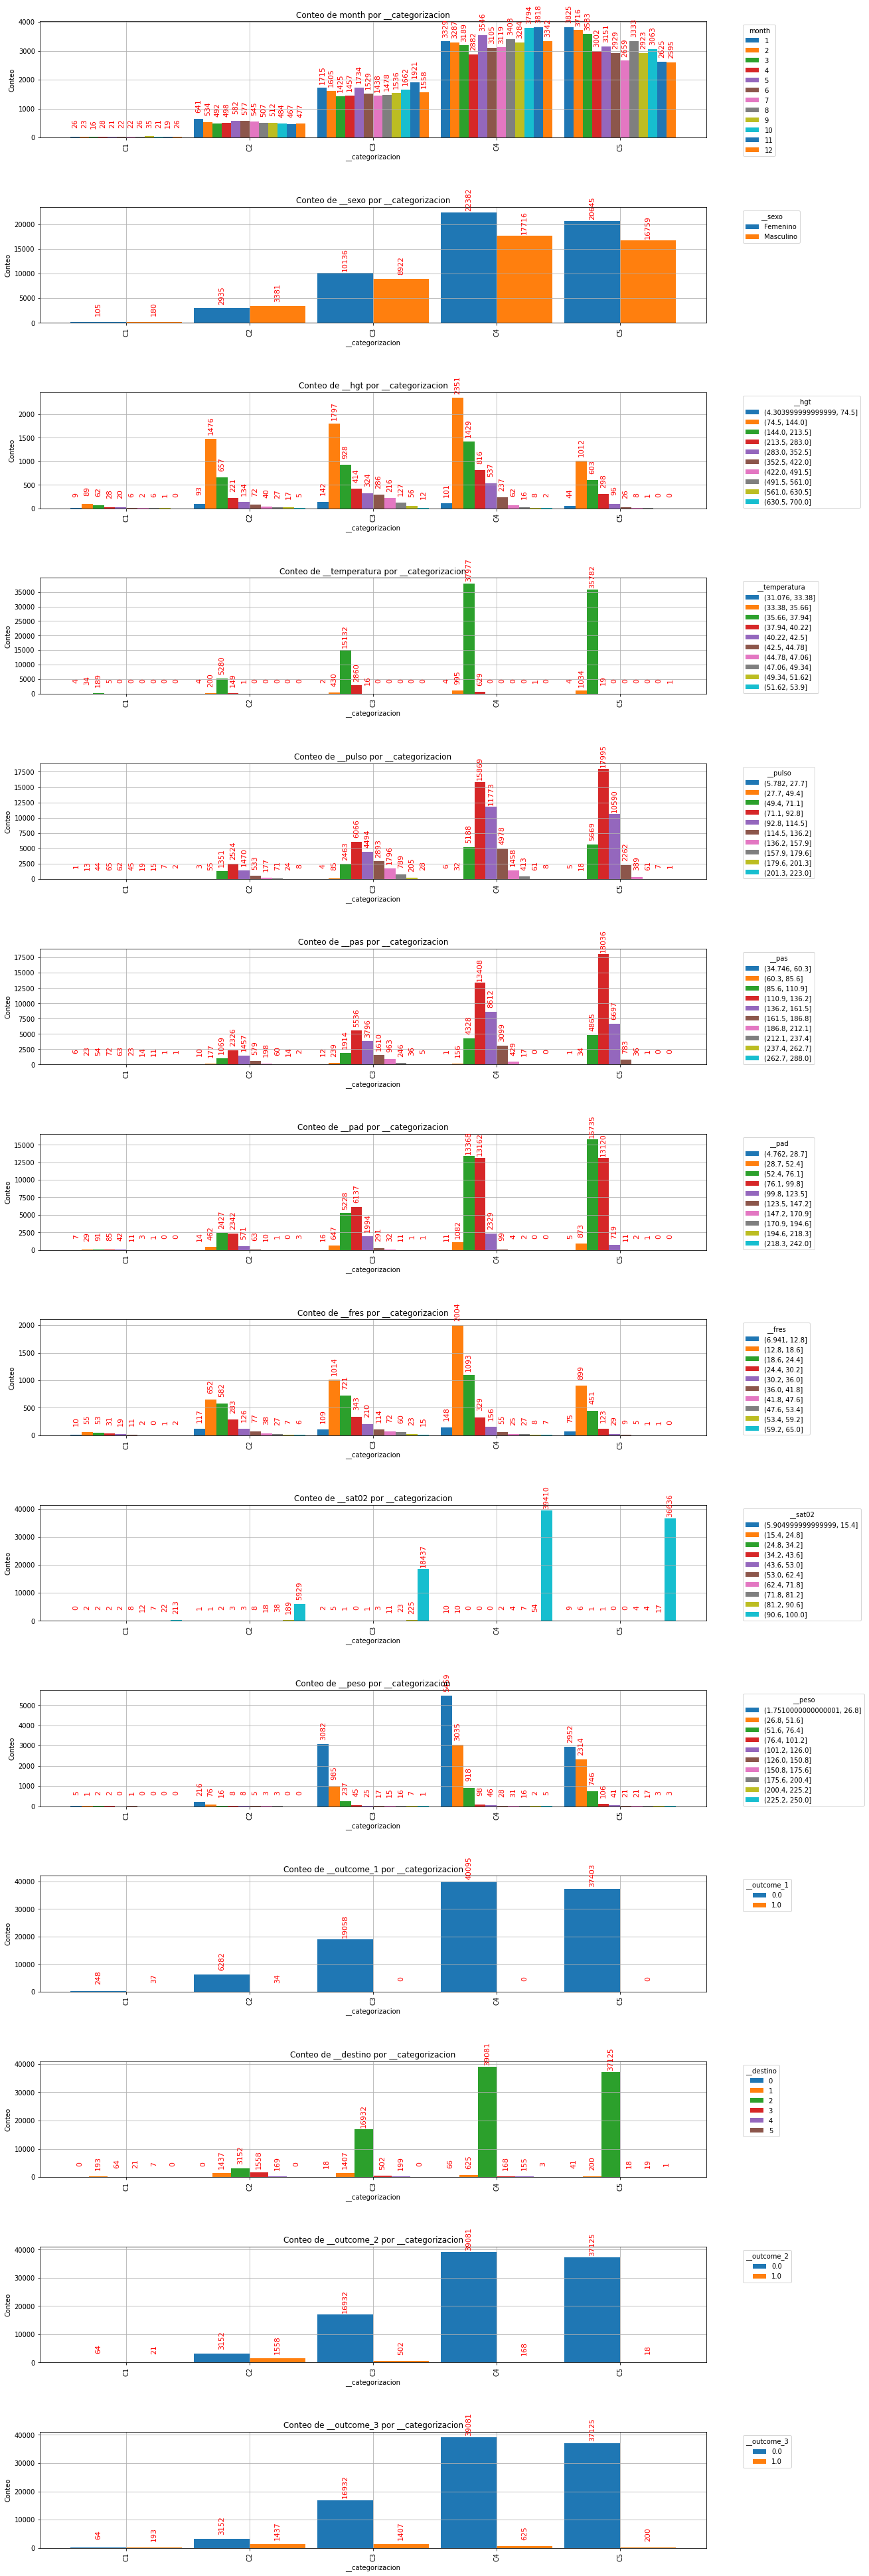

In [68]:
# Lista de columnas para las cuales queremos crear gráficos de barras
columns_to_plot = ['month', '__sexo', '__hgt', '__temperatura', '__pulso', 
                   '__pas', '__pad', '__fres', '__sat02', '__peso', 
                   '__outcome_1', '__destino', '__outcome_2', '__outcome_3']

# Crear una figura para los gráficos
fig = plt.figure(figsize=(18, len(columns_to_plot) * 5))
fig.subplots_adjust(hspace=0.6)  # Más espacio entre los gráficos
#fig.tight_layout(pad=8.0)

# Iterar sobre las columnas y crear gráficos de barras apiladas
for idx, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(len(columns_to_plot), 1, idx + 1)

    # Verificar el número de valores únicos en la columna
    unique_values = df_cleaned[column].nunique()

    # Agrupar valores en bins si hay más de 12 valores únicos
    if unique_values > 12:
        # Crear bins para los valores
        df_cleaned[column+'_binned'] = pd.cut(df_cleaned[column], bins=10, include_lowest=True)
        # Agrupar y contar los valores binned en función de '__categorizacion'
        counts = df_cleaned.groupby(['__categorizacion', column+'_binned']).size().unstack(fill_value=0)
    else:
        # Agrupar y contar los valores en función de '__categorizacion'
        counts = df_cleaned.groupby(['__categorizacion', column]).size().unstack(fill_value=0)
    
    # Crear gráfico de barras
    bar_plot = counts.plot(kind='bar', stacked=False, ax=ax, width=0.9)  # Aumentar el grosor de las barras

    # Añadir etiquetas de valores encima de cada barra
    for p in bar_plot.patches:
        bar_plot.annotate(
            str(p.get_height()), 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', 
            va='center', 
            fontsize=11, 
            color='red', 
            rotation=90,  # Rotación de 90 grados
            xytext=(0, 20), 
            textcoords='offset points'
        )

    # Ajustar los ejes y el título
    ax.set_xlabel('__categorizacion')
    ax.set_ylabel('Conteo')
    ax.set_title(f'Conteo de {column} por __categorizacion')
    ax.grid(True)

    # Colocar la leyenda fuera del gráfico, a la derecha
    ax.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')


# Mostrar la cuadrícula de gráficos
plt.show()
